<a href="https://colab.research.google.com/github/2303a51510/DATAMINING/blob/main/LAB_4_1510_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("wine_data.csv")

In [3]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34.0                  48.0  0.99832  3.38       0.86   
4                  6.0                  11.0  0.99892  3.48       0.49   

   alcohol  quality  
0      9.0        3  
1      8.4        3  
2  

In [4]:
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
print("\nDataset Statistics:")
print(df.describe())


Dataset Statistics:
       fixed_acidity  volatile_acidity   citric_acid  residual_sugar  \
count   21000.000000      21000.000000  21000.000000    21000.000000   
mean        9.797079          0.774796      0.793870       31.289348   
std         2.413919          0.365015      0.384833       19.015391   
min         3.800000          0.080000      0.000000        0.600000   
25%         7.600000          0.430000      0.410000        9.800000   
50%        10.000000          0.830000      0.870000       37.600000   
75%        11.800000          1.080000      1.110000       46.800000   
max        15.900000          1.580000      1.660000       65.800000   

          chlorides  free_sulfur_dioxide  total_sulfur_dioxide       density  \
count  21000.000000         21000.000000          21000.000000  21000.000000   
mean       0.200245           129.442333            229.008762      1.009972   
std        0.124933            77.167262            100.183265      0.012032   
min       

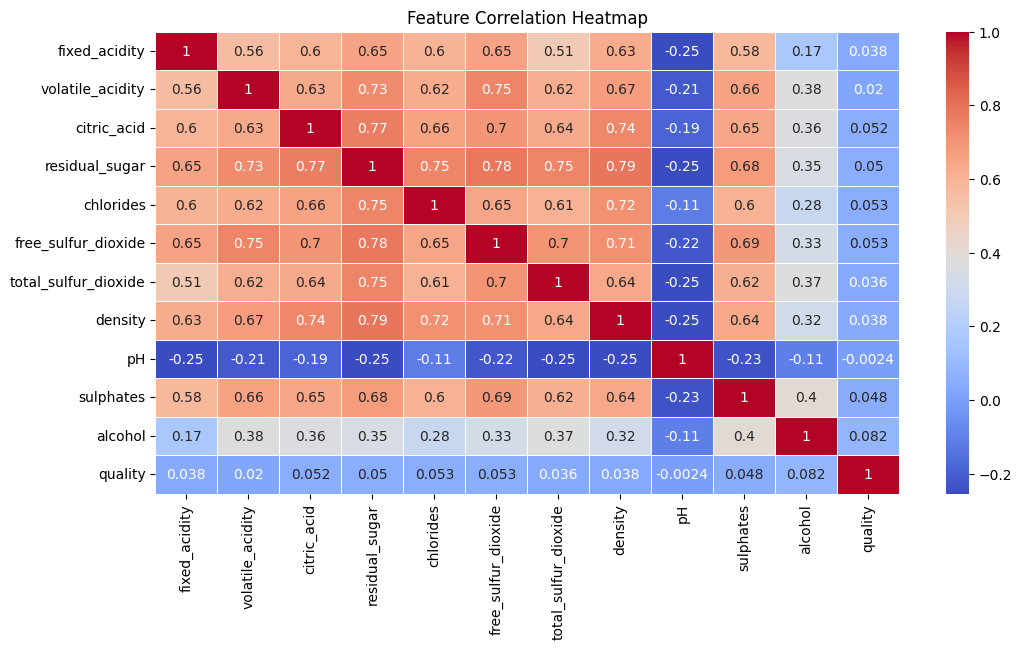

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
X = df.iloc[:, 1:]  # Assuming first column is the target (adjust if needed)
y = df.iloc[:, 0]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)  # Make sure the parenthesis is properly closed


RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8421


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1175
           1       0.80      0.90      0.85      2047
           2       0.83      0.63      0.72       978

    accuracy                           0.84      4200
   macro avg       0.85      0.82      0.83      4200
weighted avg       0.84      0.84      0.84      4200



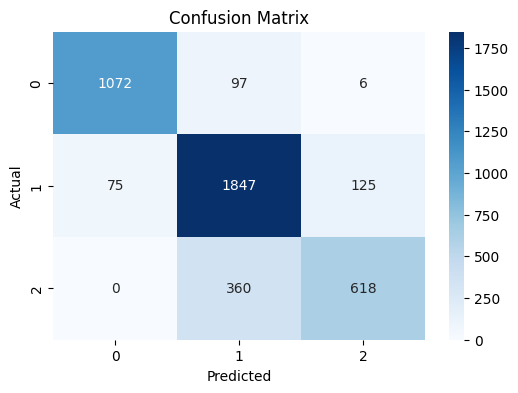

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()